## Cars Data: Classification Analysis
Predicting price of Car's price class

### Loading Libraries


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns

# importing scipy
from scipy.stats import chi2_contingency

### Loading the df Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [4]:
# Reading the df Dataset
df = pd.read_csv('cars.csv')

### Descriptive Analytics


In [5]:
# first five rows
df.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [6]:
# Doors Distribution
df.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [7]:
# Removing 2 door df 
df = df.query('doors > 2')

In [8]:
# Doors Distribution
df.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [9]:
# Removing 3 door df 
df = df.query('doors > 3')

In [10]:
# Doors Distribution
df.doors.value_counts()

5    674
4    138
Name: doors, dtype: int64

In [11]:
# last few rows
df.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1416,8950,79,40093,Petrol,110,0,Red,0,1600,5,19,1114
1420,8150,76,36537,Petrol,110,0,Red,1,1600,4,85,1075
1425,7950,80,34000,Petrol,86,1,Silver,0,1300,4,69,1000
1429,8950,78,24000,Petrol,86,1,Green,1,1300,5,85,1065
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [12]:
# dataset infor
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           812 non-null    int64 
 1   age             812 non-null    int64 
 2   km              812 non-null    int64 
 3   fuel_type       812 non-null    object
 4   hp              812 non-null    int64 
 5   metallic_color  812 non-null    int64 
 6   color           812 non-null    object
 7   automatic       812 non-null    int64 
 8   cc              812 non-null    int64 
 9   doors           812 non-null    int64 
 10  tax             812 non-null    int64 
 11  weight          812 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 82.5+ KB


In [13]:
# Unique Values
df.nunique()

price             186
age                75
km                747
fuel_type           3
hp                 10
metallic_color      2
color              10
automatic           2
cc                 10
doors               2
tax                13
weight             48
dtype: int64

In [14]:
# describe for summary stats
df.describe()

,price,age,km,hp,metallic_color,automatic,cc,doors,tax,weight
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,11214.897783,54.001232,67895.863300,102.694581,0.711823,0.054187,1606.349754,4.830049,90.348522,1083.742611
std,3922.366059,19.774593,38752.764907,13.658972,0.453193,0.226526,535.483310,0.375821,42.326492,53.824545
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,4.000000,19.000000,1000.000000
25%,8750.000000,41.000000,41459.000000,97.000000,0.000000,0.000000,1600.000000,5.000000,69.000000,1060.000000
50%,9950.000000,58.000000,62608.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,85.000000,1075.000000
75%,12450.000000,69.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,85.000000,1100.000000
max,32500.000000,80.000000,232940.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,283.000000,1615.000000


In [15]:
# changing to categorical
df.metallic_color = df.metallic_color.astype('category')

In [16]:
# Change price to categorical
df.price = np.where(df.price > 9900, 'high', 'low')

In [17]:
# Frequency
df.price.value_counts()

high    446
low     366
Name: price, dtype: int64

In [18]:
# Car info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           812 non-null    object  
 1   age             812 non-null    int64   
 2   km              812 non-null    int64   
 3   fuel_type       812 non-null    object  
 4   hp              812 non-null    int64   
 5   metallic_color  812 non-null    category
 6   color           812 non-null    object  
 7   automatic       812 non-null    int64   
 8   cc              812 non-null    int64   
 9   doors           812 non-null    int64   
 10  tax             812 non-null    int64   
 11  weight          812 non-null    int64   
dtypes: category(1), int64(8), object(3)
memory usage: 77.0+ KB


In [19]:
# changing to categorical
df.automatic = df.automatic.astype('category')

In [20]:
# changing to categorical
df.doors = df.doors.astype('category')

In [21]:
# changing to categorical
df.cc = df.cc.astype('category')


In [22]:
# Car info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           812 non-null    object  
 1   age             812 non-null    int64   
 2   km              812 non-null    int64   
 3   fuel_type       812 non-null    object  
 4   hp              812 non-null    int64   
 5   metallic_color  812 non-null    category
 6   color           812 non-null    object  
 7   automatic       812 non-null    category
 8   cc              812 non-null    category
 9   doors           812 non-null    category
 10  tax             812 non-null    int64   
 11  weight          812 non-null    int64   
dtypes: category(4), int64(5), object(3)
memory usage: 61.0+ KB


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


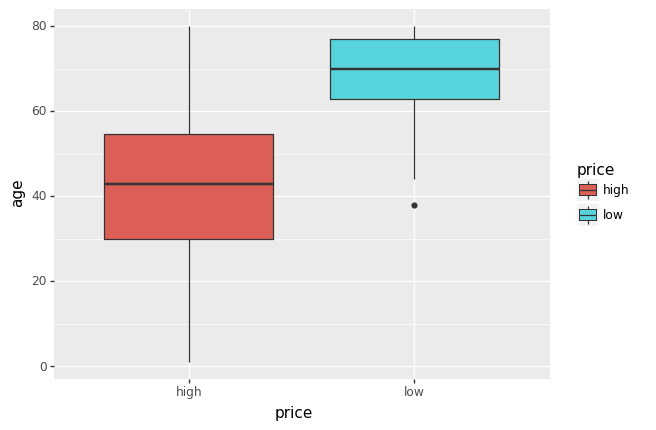

<ggplot: (8748266095749)>

In [23]:
# Boxplot of age vs price
ggplot(df,aes(x = 'price', y = 'age', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


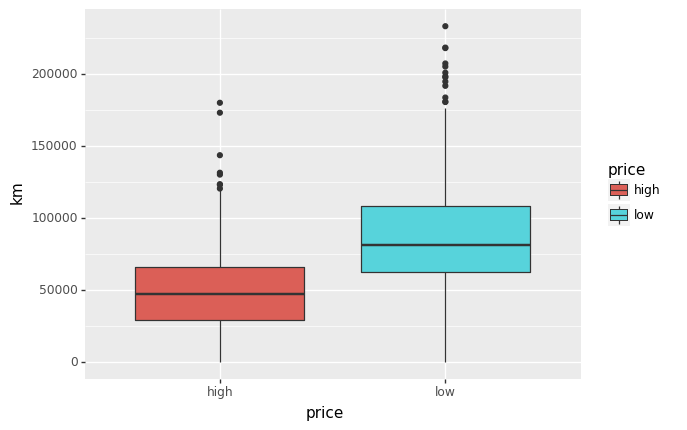

<ggplot: (8748263369285)>

In [24]:
# Boxplot of km vs price
ggplot(df,aes(x = 'price', y = 'km', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


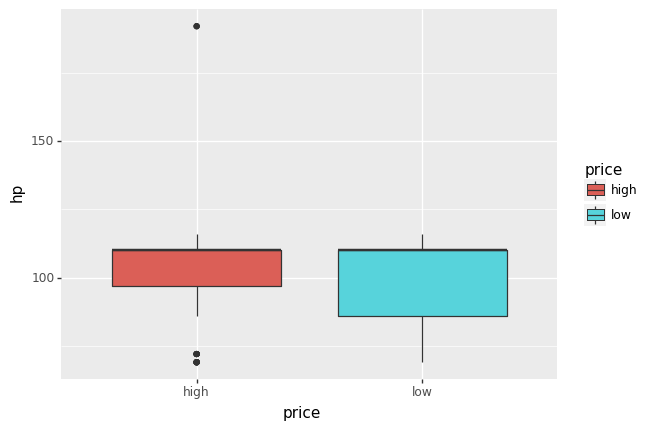

<ggplot: (8748263062189)>

In [25]:
# Boxplot of hp vs price
ggplot(df,aes(x = 'price', y = 'hp', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


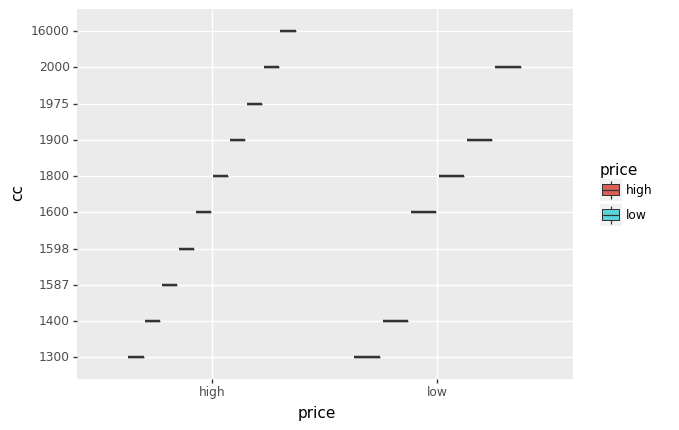

<ggplot: (8748263009069)>

In [26]:
# Boxplot of cc vs price
ggplot(df,aes(x = 'price', y = 'cc', fill = 'price' )) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


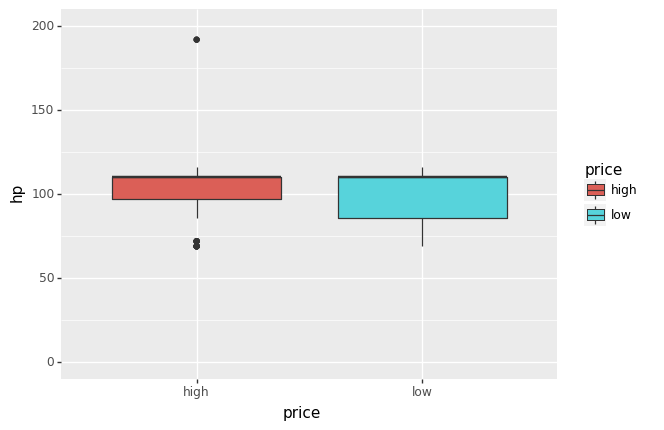

<ggplot: (8748262894805)>

In [27]:
# Boxplot of hp vs price
ggplot(df, aes(x = 'price', y = 'hp', fill = 'price')) + geom_boxplot() + ylim(0 , 200)

In [28]:
# correlation matrix
df.corr()

,age,km,hp,tax,weight
age,1.000000,0.549906,-0.132031,-0.151934,-0.464698
km,0.549906,1.000000,-0.382732,0.286587,-0.042196
hp,-0.132031,-0.382732,1.000000,-0.345328,-0.005182
tax,-0.151934,0.286587,-0.345328,1.000000,0.640472
weight,-0.464698,-0.042196,-0.005182,0.640472,1.000000


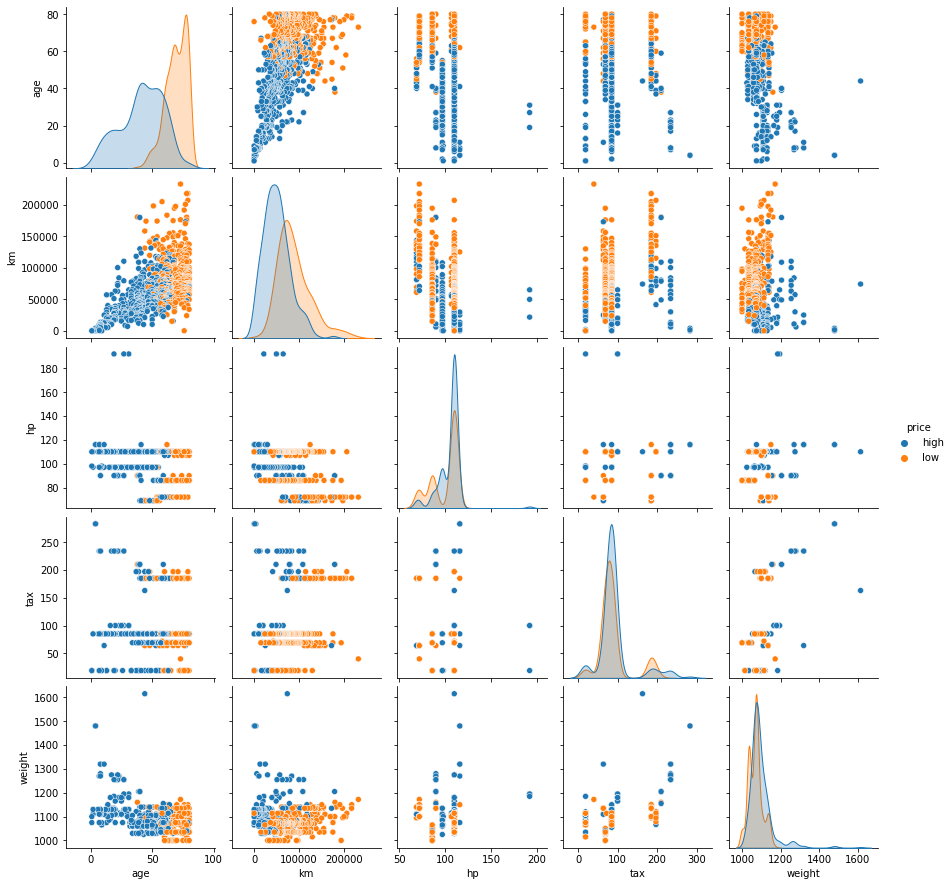

In [29]:
# scatterplot matrix
sns.pairplot(df, diag_kind= 'kde', hue = 'price')

In [30]:
# chi Square test
for col in ['fuel_type', 'metallic_color', 'automatic', 'doors']: 
  crosstab = pd.crosstab(df[col], df['price'], margins = True)
  stat, p_value, dof, expected = chi2_contingency(crosstab)
  print('P_value of Chi_Square Test between Price and ', col, p_value )

P_value of Chi_Square Test between Price and  fuel_type 0.6006724075811256
P_value of Chi_Square Test between Price and  metallic_color 0.15716054054831674
P_value of Chi_Square Test between Price and  automatic 0.9994468733881584
P_value of Chi_Square Test between Price and  doors 1.7707406633756925e-05


## Predictive analysis: Choosing predictors


In [31]:
# recoding price
df.price = np.where(df.price == 'high', 1, 0)

In [32]:
# choosing predictors
predictors = ['age', 'km', 'weight', 'fuel_type', 'metallic_color', 'doors']

In [33]:
# Target variable
target = 'price'

In [34]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first= True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_5
43,27,110404,1255,1,0,0,1
44,22,100250,1255,1,0,0,1
45,23,84000,1270,1,0,0,1
46,27,79375,1255,1,0,1,1
47,22,75048,1110,0,1,1,1


In [35]:
# Target variable 
y = df[target]
y[0:5]


43    1
44    1
45    1
46    1
47    1
Name: price, dtype: int64

In [36]:
# Target variable 
y = df[target]
y[0:4]


43    1
44    1
45    1
46    1
Name: price, dtype: int64

In [37]:
# Target variable 
y = df[target]
y[0:3]


43    1
44    1
45    1
Name: price, dtype: int64

In [38]:
# Target variable 
y = df[target]
y[0:2]


43    1
44    1
Name: price, dtype: int64

In [39]:
# Target variable 
y = df[target]
y[0:1]


43    1
Name: price, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [40]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123, stratify = y)

In [41]:
# train.info
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 1268 to 113
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               649 non-null    int64
 1   km                649 non-null    int64
 2   weight            649 non-null    int64
 3   fuel_type_Diesel  649 non-null    uint8
 4   fuel_type_Petrol  649 non-null    uint8
 5   metallic_color_1  649 non-null    uint8
 6   doors_5           649 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 22.8 KB


In [42]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1373 to 917
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               163 non-null    int64
 1   km                163 non-null    int64
 2   weight            163 non-null    int64
 3   fuel_type_Diesel  163 non-null    uint8
 4   fuel_type_Petrol  163 non-null    uint8
 5   metallic_color_1  163 non-null    uint8
 6   doors_5           163 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 5.7 KB


In [43]:
y_train.head()

1268    0
157     1
997     1
387     0
756     1
Name: price, dtype: int64

In [44]:
y_val.head()

1373    0
500     0
861     1
66      1
422     0
Name: price, dtype: int64

In [45]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

In [46]:
StandardScaler()

StandardScaler()

In [47]:
x_train_std[0:5]

array([[ 0.76272645,  0.1694246 , -1.51254353, -0.36959769,  0.39605902,
         0.64099108, -2.13237158],
       [-2.17742194, -1.42396041,  0.55002839, -0.36959769,  0.39605902,
         0.64099108,  0.46896142],
       [ 0.45857317, -0.68243727,  0.53209298, -0.36959769,  0.39605902,
         0.64099108,  0.46896142],
       [-0.30181004,  1.88084758,  0.62177002, -0.36959769, -2.52487623,
        -1.56008411,  0.46896142],
       [ 0.5599576 ,  0.30079601, -0.25706497, -0.36959769,  0.39605902,
        -1.56008411,  0.46896142]])

In [48]:
x_train_std[0:4]

array([[ 0.76272645,  0.1694246 , -1.51254353, -0.36959769,  0.39605902,
         0.64099108, -2.13237158],
       [-2.17742194, -1.42396041,  0.55002839, -0.36959769,  0.39605902,
         0.64099108,  0.46896142],
       [ 0.45857317, -0.68243727,  0.53209298, -0.36959769,  0.39605902,
         0.64099108,  0.46896142],
       [-0.30181004,  1.88084758,  0.62177002, -0.36959769, -2.52487623,
        -1.56008411,  0.46896142]])

In [49]:
x_train_std[0:3]

array([[ 0.76272645,  0.1694246 , -1.51254353, -0.36959769,  0.39605902,
         0.64099108, -2.13237158],
       [-2.17742194, -1.42396041,  0.55002839, -0.36959769,  0.39605902,
         0.64099108,  0.46896142],
       [ 0.45857317, -0.68243727,  0.53209298, -0.36959769,  0.39605902,
         0.64099108,  0.46896142]])

In [50]:
x_train_std[0:2]

array([[ 0.76272645,  0.1694246 , -1.51254353, -0.36959769,  0.39605902,
         0.64099108, -2.13237158],
       [-2.17742194, -1.42396041,  0.55002839, -0.36959769,  0.39605902,
         0.64099108,  0.46896142]])

In [51]:
x_train_std[0:1]

array([[ 0.76272645,  0.1694246 , -1.51254353, -0.36959769,  0.39605902,
         0.64099108, -2.13237158]])

## Logistic regression model


In [52]:
# import the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [53]:
# logistic model
model = LogisticRegression()

In [54]:
# train the model 
model.fit(x_train, y_train)

LogisticRegression()

In [55]:
# Prediction
y_pred = model.predict(x_val)

In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(x_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1,2,6,7,8,11,13,20,22,...,127000,131273,133405,138500,151300,155500,158320,170000,191620,198167
0,60,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,60,13
1,17,73


In [58]:
# evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.8159509202453987
Recall 0.8111111111111111
Precision 0.8488372093023255
F1 Score 0.8295454545454545


## ROC Curve

In [59]:
# Extracting probabilities 
probs = pd.Series(model.predict_proba(x_val)[:, 1])
probs

0      0.086313
1      0.909325
2      0.333534
3      0.999704
4      0.845152
         ...   
158    0.999351
159    0.004605
160    0.639704
161    0.019081
162    0.618091
Length: 163, dtype: float64

In [60]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score


Text(0, 0.5, 'TPR or Sensitivity')

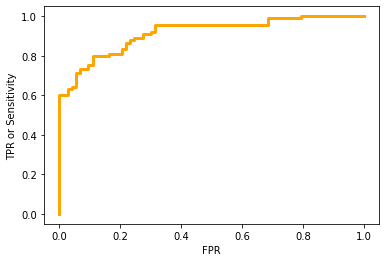

In [61]:
# roc curve 
fpr, tpr, _= roc_curve(y_val, probs)
plt.plot(fpr, tpr, color = 'orange', lw = 3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [62]:
# AUC: higher the better
roc_auc_score(y_val,probs)

0.9158295281582954

## Crossvalidation Classification

In [63]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [64]:
from sklearn.utils import shuffle
# crossvalidation 
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits= 10, random_state= 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Scores', scores.mean())

[0.82485876 0.8700565  0.86046512 0.89772727 0.9047619  0.87719298
 0.87292818 0.87209302 0.87777778 0.92655367]
Mean f1 Scores 0.8784415180607231


### Decision tree 

In [69]:
# Importing decision tree 
from sklearn.tree import DecisionTreeregressor
model = DecisionTreeRegressor(random_state = 0, max_depth = 4)
model.fit(x_train_std,y_train)

ImportError: ignored